In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

### 1. Read the Database

In this assignment, we will investigate whether quantile range based feature is predictive of future log RV of CBA in at least one-day-ahead.

In [3]:
#import cba sqlite dataset

conn = sqlite3.connect('cba_log_rv.sqlite')
c = conn.cursor()

query = '''SELECT *
             FROM log_rv;'''
# using pandas to extrct cba sqlite 
log_rv1 = pd.read_sql (query, conn)
log_rv1

,date,log_rv
0,2003-01-07,-0.195388
1,2003-01-08,-0.779210
2,2003-01-09,-0.196713
3,2003-01-10,0.067592
4,2003-01-13,-0.838226
...,...,...
4694,2021-08-16,-0.271400
4695,2021-08-17,-0.413196
4696,2021-08-18,-0.151205
4697,2021-08-19,-0.295768


In [4]:
# import quartile range feature 
query_Qtile = '''SELECT *
             FROM qtl_rng_feature;'''
# using pandas to extract quantile data 
Qtile = pd.read_sql (query_Qtile, conn)

Qtile

,date,qtl_rng_lag1,qtl_rng_avg5,qtl_rng_avg22,qtl_rng_avg253,qtl_rng_up
0,2003-01-07,0.269568,0.320090,0.304471,0.309980,0
1,2003-01-08,0.361912,0.321091,0.307479,0.310409,0
2,2003-01-09,0.271133,0.320783,0.303049,0.310296,0
3,2003-01-10,0.286407,0.311396,0.297146,0.310441,0
4,2003-01-13,0.434706,0.324745,0.304952,0.311234,0
...,...,...,...,...,...,...
4694,2021-08-16,0.341765,0.312585,0.261822,0.312503,0
4695,2021-08-17,0.262366,0.311847,0.265213,0.312003,0
4696,2021-08-18,0.314158,0.332025,0.268340,0.311909,0
4697,2021-08-19,0.339382,0.330446,0.268275,0.311960,0


In [5]:
# Merge two tables
query_total = ''' SELECT l.date, l.log_rv, Q.qtl_rng_lag1, Q.qtl_rng_avg5, Q.qtl_rng_avg22, Q.qtl_rng_avg253,Q.qtl_rng_up
            FROM log_rv l
            JOIN qtl_rng_feature Q
            ON l.date = Q.date; '''

new_table = pd.read_sql (query_total, conn)

new_table



,date,log_rv,qtl_rng_lag1,qtl_rng_avg5,qtl_rng_avg22,qtl_rng_avg253,qtl_rng_up
0,2003-01-07,-0.195388,0.269568,0.320090,0.304471,0.309980,0
1,2003-01-08,-0.779210,0.361912,0.321091,0.307479,0.310409,0
2,2003-01-09,-0.196713,0.271133,0.320783,0.303049,0.310296,0
3,2003-01-10,0.067592,0.286407,0.311396,0.297146,0.310441,0
4,2003-01-13,-0.838226,0.434706,0.324745,0.304952,0.311234,0
...,...,...,...,...,...,...,...
4694,2021-08-16,-0.271400,0.341765,0.312585,0.261822,0.312503,0
4695,2021-08-17,-0.413196,0.262366,0.311847,0.265213,0.312003,0
4696,2021-08-18,-0.151205,0.314158,0.332025,0.268340,0.311909,0
4697,2021-08-19,-0.295768,0.339382,0.330446,0.268275,0.311960,0


### 2. Data Inspection

In [6]:
# data quality check 
print (new_table. info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4699 non-null   object 
 1   log_rv          4699 non-null   float64
 2   qtl_rng_lag1    4699 non-null   float64
 3   qtl_rng_avg5    4699 non-null   float64
 4   qtl_rng_avg22   4699 non-null   float64
 5   qtl_rng_avg253  4699 non-null   float64
 6   qtl_rng_up      4699 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 257.1+ KB
None


All columns have non-null values and are in the correct data types through data quality inspection, which indicates the datasets are free from noise and missing data. To make datasets tidy, the log RV of CBA and quantile range-based features are merged. 

### 3. EDA Performance and Discussion-- Numerical Data (Discussion will be bound with following plots)

In [7]:
#Central tendencies
print (new_table['log_rv'].describe())
print (new_table['qtl_rng_lag1'].describe())
print (new_table['qtl_rng_avg5'].describe())
print (new_table['qtl_rng_avg22'].describe())
print (new_table['qtl_rng_avg253'].describe())

count    4699.000000
mean       -0.320671
std         0.875243
min        -2.517151
25%        -0.906078
50%        -0.444120
75%         0.115912
max         6.157408
Name: log_rv, dtype: float64
count    4699.000000
mean        0.338228
std         0.193476
min         0.089359
25%         0.230271
50%         0.286915
75%         0.377578
max         2.923049
Name: qtl_rng_lag1, dtype: float64
count    4699.000000
mean        0.338242
std         0.175566
min         0.132273
25%         0.239592
50%         0.290131
75%         0.367847
max         2.305676
Name: qtl_rng_avg5, dtype: float64
count    4699.000000
mean        0.338255
std         0.159756
min         0.160085
25%         0.246991
50%         0.291677
75%         0.364560
max         1.595689
Name: qtl_rng_avg22, dtype: float64
count    4699.000000
mean        0.338932
std         0.120021
min         0.220998
25%         0.257643
50%         0.296866
75%         0.356540
max         0.745837
Name: qtl_rng_avg253, dty

In [8]:
#Skewness check
print (new_table['log_rv'].skew())
print (new_table['qtl_rng_lag1'].skew())
print (new_table['qtl_rng_avg5'].skew())
print (new_table['qtl_rng_avg22'].skew())
print (new_table['qtl_rng_avg253'].skew())

0.9623542232105947
3.6939166741937277
3.642994903649124
2.8859672737768403
1.8320919225491739


In [9]:
#Kurtosis check (ProjectPro, n.d.)
print (new_table['log_rv'].kurt())
print (new_table['qtl_rng_lag1'].kurt())
print (new_table['qtl_rng_avg5'].kurt())
print (new_table['qtl_rng_avg22'].kurt())
print (new_table['qtl_rng_avg253'].kurt())

1.888578657613182
24.88961860729336
23.189185566839893
12.05021163720127
2.8911492930929668


The EDA starts by examining its central tendencies. All features have the same mean and median, and their standard deviations and maximum value get smaller when periods get longer. Skewness check shows that all skewness are strongly positive, especially that lag1 and avg 5 have incredibly high skewness, meaning that the data are close to left-skewed distribution. However, there may be many extremely high price values in lag 1 and lag 5; the histogram will be adopted to test it. Then, most kurtosis values are well above 3, except the average quantile range over 253 trading days, indicating the fat-tailed nature of most financial returns. However, in all mentioned tests, the log realized variance of CBA seems unmatched with these features and shows distinct values.

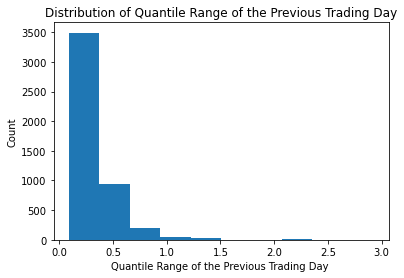

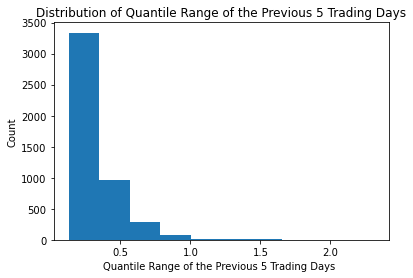

In [10]:
## Histogram title
plt.hist(new_table['qtl_rng_lag1'])

plt.xlabel('Quantile Range of the Previous Trading Day ')
plt.ylabel('Count')
plt.title('Distribution of Quantile Range of the Previous Trading Day')

plt.show()

plt.hist(new_table['qtl_rng_avg5'])

plt.xlabel('Quantile Range of the Previous 5 Trading Days ')
plt.ylabel('Count')
plt.title('Distribution of Quantile Range of the Previous 5 Trading Days')

plt.show()


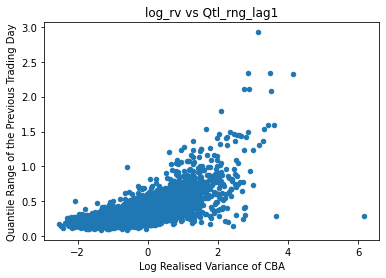

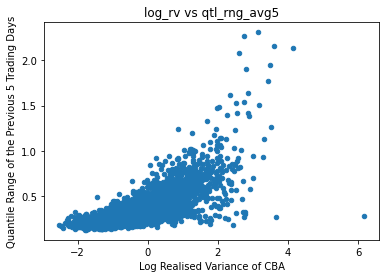

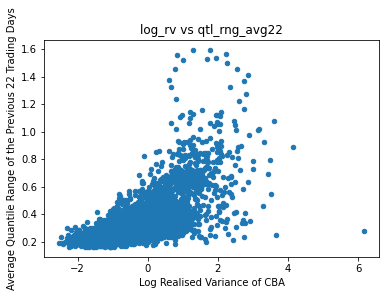

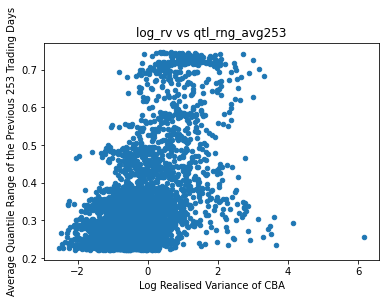

In [17]:
# Scatter Plot title

x1= new_table ["log_rv"]
y1= new_table ["qtl_rng_lag1"]


plt.scatter(x1, y1, marker = 'o', s = 20, alpha = 1)

plt.xlabel('Log Realised Variance of CBA')
plt.ylabel('Quantile Range of the Previous Trading Day')
plt.title('log_rv vs Qtl_rng_lag1')

plt.show ()

x2= new_table ["log_rv"]
y2= new_table ["qtl_rng_avg5"]


plt.scatter(x2, y2, marker = 'o', s = 20, alpha = 1)

plt.xlabel('Log Realised Variance of CBA')
plt.ylabel('Quantile Range of the Previous 5 Trading Days')
plt.title('log_rv vs qtl_rng_avg5')

plt.show ()

x3= new_table ["log_rv"]
y3= new_table ["qtl_rng_avg22"]


plt.scatter(x3, y3, marker = 'o', s = 20, alpha = 1)

plt.xlabel('Log Realised Variance of CBA')
plt.ylabel('Average Quantile Range of the Previous 22 Trading Days')
plt.title('log_rv vs qtl_rng_avg22')

plt.show ()


x4= new_table ["log_rv"]
y4= new_table ["qtl_rng_avg253"]


plt.scatter(x4, y4, marker = 'o', s = 20, alpha = 1)

plt.xlabel('Log Realised Variance of CBA')
plt.ylabel('Average Quantile Range of the Previous 253 Trading Days')
plt.title('log_rv vs qtl_rng_avg253')

plt.show ()

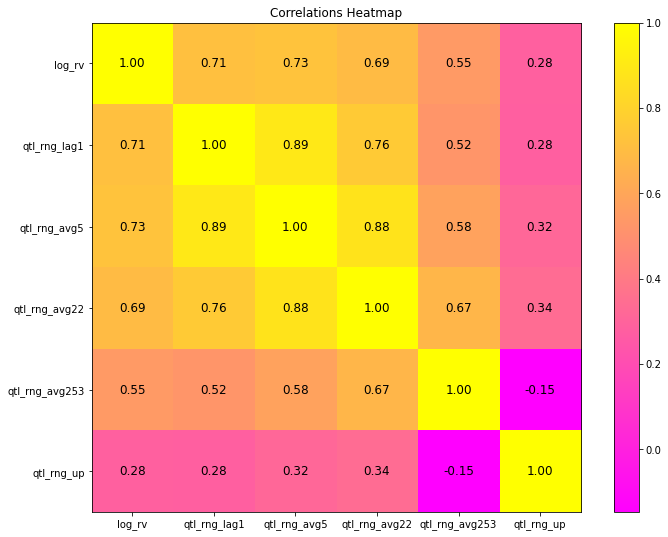

In [12]:
##correlation examination - Heatmap
plt.figure(figsize = (12,9))
corr = new_table.corr()
n_var = len(corr)

plt.imshow(corr, cmap = 'spring' )

plt.xticks(range(n_var),corr.columns)
plt.yticks(range(n_var),corr.columns)

for i in range(n_var):
    for j in range(n_var):
        plt.text(i, j, '{:.2f}'.format(corr.iloc[i, j]), ha="center", va="center", color="k", fontsize = 12)

        
plt.colorbar()



plt.title('Correlations Heatmap')

plt.show()

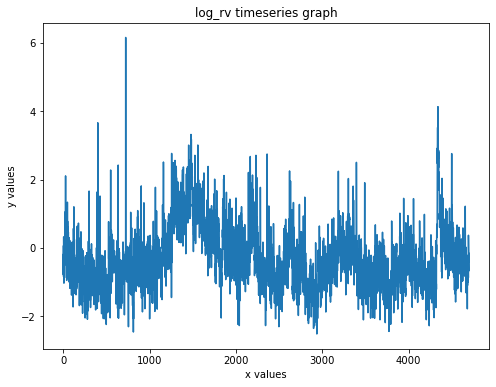

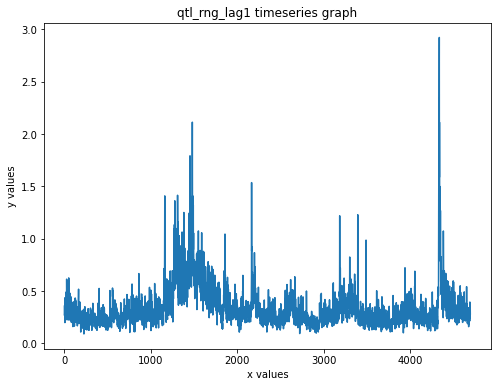

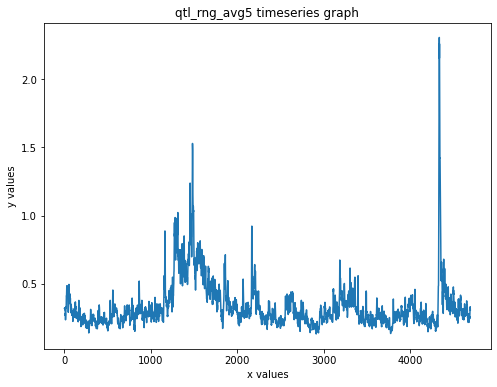

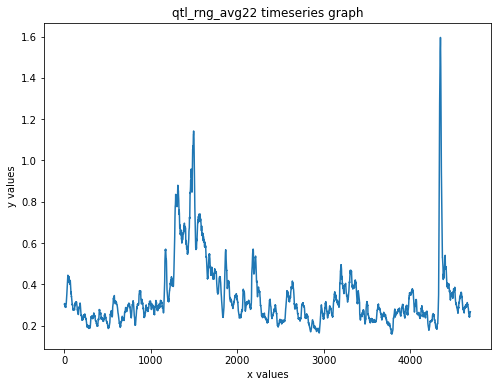

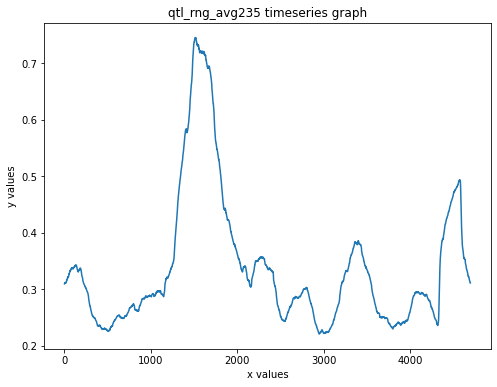

In [13]:
# Timeseries graph title
plt.figure(figsize = (8,6))
plt.plot(new_table.index, new_table.log_rv)


plt.xlabel('x values')
plt.ylabel('y values')

plt.title('log_rv timeseries graph')

plt.show()

plt.figure(figsize = (8,6))
plt.plot(new_table.index, new_table.qtl_rng_lag1)


plt.xlabel('x values')
plt.ylabel('y values')

plt.title('qtl_rng_lag1 timeseries graph')

plt.show()


plt.figure(figsize = (8,6))
plt.plot(new_table.index, new_table.qtl_rng_avg5)


plt.xlabel('x values')
plt.ylabel('y values')

plt.title('qtl_rng_avg5 timeseries graph')

plt.show()

plt.figure(figsize = (8,6))
plt.plot(new_table.index, new_table.qtl_rng_avg22)


plt.xlabel('x values')
plt.ylabel('y values')

plt.title('qtl_rng_avg22 timeseries graph')

plt.show()

plt.figure(figsize = (8,6))
plt.plot(new_table.index, new_table.qtl_rng_avg253)


plt.xlabel('x values')
plt.ylabel('y values')

plt.title('qtl_rng_avg235 timeseries graph')

plt.show()

As illustrated in histograms, except for the outliers, the enlarging scale of quantile figures may also lead to higher skewness. After that, all features are positively related to Log RV of CBA; the relationship is much more robust in fewer trading days. In each plot, most observations lie around a positively sloped straight line, but with few observations that do not follow the general patterns. The correlations between the Log RV of CBA and features are pretty strong, indicating the features are positively correlated with the Log RV. While most correlations decrease within longer trading days as described in previous plots. The correlation between different features is medium and still positive, especially the quantile range between 1 trading day and 5 trading days is the highest, accounting for 0.89. Finally, in the time-series line graph, we can see that as the time interval gets longer, there will be a more smooth dataset and decreasing price fluctuations illustrated in the data. It means the granularity is lost in the more extended period, and some information is collapsing.

### 3. EDA Performance and Discussion -- Catogerical Data

In [14]:
# Aggregation - Groupby
quantile_rge = new_table['qtl_rng_up'].value_counts()
print(quantile_rge)

0    2699
1    2000
Name: qtl_rng_up, dtype: int64


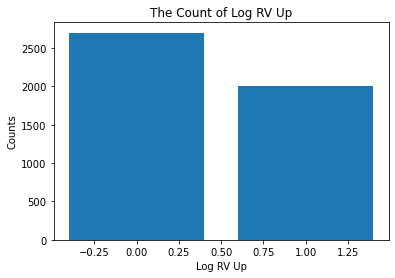

In [18]:
# Bar chart  x,y title
xpos = [0, 1]
height = [2699,2000]

plt.bar(xpos, height)

plt.xlabel('Log RV Up')
plt.ylabel('Counts')
plt.title('The Count of Log RV Up')

plt.show()

The number of 0 (qtl_rng_avg22 < qtl_rng_avg253) overweights the number of 1 (qtl_rng_avg22 > qtl_rng_avg253), this varifies that the average quantile range increases as the number of trading days go longer.

### 4. Conclusion and Further Works

In conclusion, the quantile ranged returns generally follow a random walk, and the correlations of quantile ranged features are mostly positive with the log RV returns of CBA. In terms of the predictability of these features, the quantile ranged features for fewer trading periods show strong predictability, as in more extended periods, some price fluctuations will be ignored, and the correlations between features and Log RV are weakening. 

In terms of further works, our group can choose to focus on predictable quantile ranged features such as qtl_rng_lag 1 and qtl_rng_lag 5. Or we can improve the remaining features, such as looking for the reasons for weakening correlations and fluctuations. Then, we should choose a model to fit these features and conduct return forecasting better.


### 5. References

In [16]:
#ProjectPro. (n.d.). How to calculate skewness and kurtosis using pandas? https://www.projectpro.io/recipes/calculate-skewness-and-kurtosis-pandas